# Version 3 - Prompter Module

## Ver 3.1 - Add initial prompter module (generate questions based on goal and code)
- Added `prompter.py` 
- Added a prompter dataclass (just for formatting)
- Added prompter to the `Manager` class

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, structured questions to prompt the user to gain insights from data visualizations. 
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

``[
    { "index": 0,  "question": "What is the distribution of X"} ..
    ]
``
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt = f"""
The visualization is: {goal.visualization}. The question the visualization wants to answer is: {goal.question}. The rationale for choosing the visualization is: {goal.rationale}. The code of the visualization is: {code}.
"""
```

## Ver 3.2 - Remove code from prompt and generate questions with rationale
- Removed code from prompts to see if having goal context is enough (answer: ?)
- Generated rationale

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, structured questions to prompt the user to gain insights from a data visualization given their goal. 
The QUESTIONS YOU ASK MUST INCITE INSIGHTFUL IDEAS AND BE MEANINGFUL (e.g., related to the goal). Each prompting question must include a question and a rationale (JUSTIFICATION FOR WHAT we will learn from the answering the question).
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "question": "What is the distribution of X", "rationale": "This tells about "} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt = f"""
The visualization is: {goal.visualization}. The question the visualization wants to answer is: {goal.question}. The rationale for choosing the visualization is: {goal.rationale}.
"""
```

## Ver 3.3 - Add initial insight module
- Added an insight module to generate insights given the user's goal, questions about the visualization, and answers to the questions
- Observations: generated insights are not as insightful as I would like LOL

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, and creative insights and connections based on the answers the user gave to specific questions about a visualization given their goal. 
The INSIGHTS YOU GENERATE MUST BE INSIGHTFUL AND BE MEANINGFUL (e.g., related to the goal). 
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "insight": "The x could indicate ..."} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt = f"""
The visualization is: {goal.visualization}. The question the visualization wants to answer is: {goal.question}. The rationale for choosing the visualization is: {goal.rationale}.
\nHere are the questions about the visualization and the corresponding answers:
"""
```

## Ver 3.4 - Modify prompt to make insights better

- prompt modification

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, and creative insights and connections based on the answers the user gave to specific questions about a visualization given their goal. 
You should give possible and deeper explanations for the insights you generated. 
"""
```

## Ver 3.5 - Experimenting with the prompt to generate as much insigtful insights

``` python
SYSTEM_PROMPT = """

"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "insight": "The x could indicate ..."} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt += f"""
\nThese are the egoals of the user and the visualization they used:
\nQuestion: {goal.question}
\nVisualization: {goal.visualization}
\nRationale: {goal.rationale}
\nCan you generate insights from the user's answers that draws connections between them?
"""
```

## Ver 3.6 - Making a stronger prompt to generate stronger insights

``` python
SYSTEM_PROMPT = """
You are a an experienced data analyst who can generate a given number of meaningful AND creative insights that people may miss at a first glance about a chart, given the goal of the data visualization and a series of questions answered by a user. 
\nBased on these questions, I want you to generate insights that make connections between the answers that the user gave. I want you to go beyond just describing the data and try to make connections and create hypothesis for why the data appears to be that certain way.
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "insight": "The x could indicate ..."} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt += f"""
\nThis is the goal of the user:
\nQuestion: {goal.question}
\nVisualization: {goal.visualization}
\nRationale: {goal.rationale}
\nCan you generate insights from the user's answers that draws connections between them?
"""
```

## Setup

In [66]:
%pip uninstall -y lida 
%pip install -U python-dotenv
%pip install -U llmx
%pip install pandas
%pip install matplotlib
%pip install plotly
# !pip install lida[infographics] # for infographics support

Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip show lida

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
import pprint

In [4]:
from dotenv import load_dotenv

load_dotenv()

True

In [6]:
sys.path.append(os.path.abspath('../..'))

In [7]:
from lida.components.manager import Manager
from llmx import TextGenerationConfig, llm

In [8]:
lida = Manager(text_gen = llm("openai", api_key=os.getenv("APIKEY"))) # !! api key
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o-mini", use_cache=True)

In [9]:
display(lida)

## Summarize Data, Generate Goals

### Summarize

In [44]:
summary = lida.summarize("../sensor.csv", summary_method="default", textgen_config=textgen_config)  
pprint.pprint(summary)

here
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
{'NORMAL': 4190, 'RECOVERING': 310}
{'dataset_description': '',
 'field_names': ['Unnamed__0',
                 'timestamp',
                 'sensor_00',
                 'sensor_01',
                 'sensor_02',
                 'sensor_03',
                 'sensor_04',
                 'sensor_05',
                 'sensor_

### Generate Goals without a Persona

In [21]:
goals = lida.goals(summary, n=20, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What are the average Retail Prices for different car Types?

**Visualization:** `bar chart of average Retail_Price grouped by Type`

**Rationale:** This visualization will help us understand the pricing strategy across different car categories (Type), revealing which types are generally more expensive. The fields used are 'Retail_Price' for pricing and 'Type' for categorization, making it easy to compare average prices across the five unique car types.



### Goal 1
---
**Question:** How does the distribution of Engine Sizes vary across different Types of cars?

**Visualization:** `box plot of Engine_Size__l_ grouped by Type`

**Rationale:** A box plot will show the spread and central tendency of engine sizes for each car type (Type). This will highlight any significant differences in engine size, helping to identify trends or preferences within each category. The fields used are 'Engine_Size__l_' for engine size and 'Type' for car categorization.



### Goal 2
---
**Question:** What is the relationship between Horsepower and Type of car?

**Visualization:** `scatter plot of Horsepower_HP_ colored by Type`

**Rationale:** This scatter plot will help visualize how horsepower varies among different car types (Type), allowing us to identify any patterns or outliers in performance. The fields 'Horsepower_HP_' will provide the horsepower data, while 'Type' will categorize the cars.



### Goal 3
---
**Question:** What is the count of cars per Type, and how does it relate to their average Retail Price?

**Visualization:** `dual-axis bar chart of count of cars by Type and average Retail_Price by Type`

**Rationale:** This visualization will provide insights into the market share of each car type (Type) and its average pricing (Retail_Price). The dual-axis allows us to see both the number of cars and their average pricing, revealing potential trends in car popularity versus pricing. The fields used are 'Type' for categorization and 'Retail_Price' for pricing.



### Goal 4
---
**Question:** What are the most common Types of cars and how do they compare in terms of City and Highway Miles Per Gallon?

**Visualization:** `grouped bar chart of average City_Miles_Per_Gallon and Highway_Miles_Per_Gallon by Type`

**Rationale:** This grouped bar chart will allow us to compare fuel efficiency (City_Miles_Per_Gallon and Highway_Miles_Per_Gallon) across different car types (Type). This is important for understanding consumer preferences regarding fuel efficiency. The fields used are 'Type' for categorization and both 'City_Miles_Per_Gallon' and 'Highway_Miles_Per_Gallon' for efficiency metrics.



### Goal 5
---
**Question:** What is the correlation between Retail Price and Dealer Cost?

**Visualization:** `scatter plot of Retail_Price vs Dealer_Cost`

**Rationale:** This visualization helps to understand the relationship between the retail price and the dealer cost of cars. By plotting these two numerical fields against each other, we can identify if higher dealer costs are associated with higher retail prices, which is crucial for pricing strategies.



### Goal 6
---
**Question:** How does the distribution of Horsepower vary by car Type?

**Visualization:** `box plot of Horsepower_HP_ grouped by Type`

**Rationale:** A box plot allows us to visualize the distribution of horsepower across different car types, highlighting the median, quartiles, and potential outliers. This is important for understanding performance expectations within each car category.



### Goal 7
---
**Question:** What is the relationship between Engine Size and Fuel Efficiency (City and Highway MPG)?

**Visualization:** `scatter plot of Engine_Size__l_ vs City_Miles_Per_Gallon and Highway_Miles_Per_Gallon`

**Rationale:** By plotting engine size against both city and highway miles per gallon, we can analyze how engine size influences fuel efficiency. This dual scatter plot will help identify trends and correlations that can inform decisions on engine design and fuel economy.



### Goal 8
---
**Question:** What is the impact of Weight on Horsepower?

**Visualization:** `scatter plot of Weight vs Horsepower_HP_`

**Rationale:** This scatter plot will illustrate the relationship between the weight of a car and its horsepower. Understanding this correlation can be vital for performance analysis and vehicle design, as heavier cars may require more horsepower to achieve similar performance.



### Goal 9
---
**Question:** How does the number of Cylinders relate to Retail Price?

**Visualization:** `bar chart of average Retail_Price by Cyl`

**Rationale:** A bar chart showing the average retail price for cars based on the number of cylinders will help us understand how engine configuration affects pricing. This is particularly useful for market segmentation and targeting based on performance characteristics.



### Goal 10
---
**Question:** How does the relationship between Engine Size, Weight, and Retail Price vary across different Types of cars?

**Visualization:** `scatter plot of Engine_Size__l_ vs Weight colored by Type with Retail_Price as the size of the points`

**Rationale:** This visualization will help us understand how Engine Size and Weight interact with the Retail Price of cars, segmented by their Type. It allows for an analysis of trends and patterns, showcasing how larger or heavier vehicles might correlate with higher Retail Prices, while also observing differences across Types.



### Goal 11
---
**Question:** What is the relationship between Horsepower, Cylinders, and City Miles Per Gallon?

**Visualization:** `3D scatter plot of Horsepower_HP_ vs Cyl colored by City_Miles_Per_Gallon`

**Rationale:** This visualization provides insight into how the number of Cylinders and Horsepower impact fuel efficiency in terms of City Miles Per Gallon. By visualizing these three variables together, we can identify potential trade-offs between power and fuel efficiency.



### Goal 12
---
**Question:** How do Weight, Wheel Base, and Highway Miles Per Gallon relate to each other across different Types of cars?

**Visualization:** `bubble chart of Weight vs Wheel_Base with Highway_Miles_Per_Gallon as the size of the bubbles, colored by Type`

**Rationale:** This visualization will illustrate how Weight and Wheel Base influence fuel efficiency on the highway, while allowing us to observe variations across car Types. The use of a bubble chart will enable us to see the relative impact of these dimensions on fuel economy.



### Goal 13
---
**Question:** What is the correlation between Retail Price, Dealer Cost, and Engine Size?

**Visualization:** `heatmap showing the correlation coefficients between Retail_Price, Dealer_Cost, and Engine_Size__l_`

**Rationale:** This heatmap will provide a clear visual representation of the correlations between these three variables. Understanding how closely Retail Price and Dealer Cost relate to Engine Size will help in assessing pricing strategies and market positioning.



### Goal 14
---
**Question:** How does the relationship between Type, City Miles Per Gallon, and Highway Miles Per Gallon vary?

**Visualization:** `grouped bar chart comparing average City_Miles_Per_Gallon and Highway_Miles_Per_Gallon for each Type`

**Rationale:** This grouped bar chart allows for easy comparison of fuel efficiency metrics between different Types of cars. It highlights how car Type influences city versus highway fuel efficiency, which is critical for consumers making purchasing decisions.



### Goal 15
---
**Question:** What is the relationship between Engine Size and Retail Price?

**Visualization:** `scatter plot of Engine_Size__l_ vs Retail_Price`

**Rationale:** This visualization allows us to observe if there is a correlation between the size of the engine and the retail price of the cars. A scatter plot is appropriate here as it can reveal patterns, trends, and potential outliers in the relationship between these two continuous variables.



### Goal 16
---
**Question:** How does Weight influence Highway Miles Per Gallon?

**Visualization:** `scatter plot of Weight vs Highway_Miles_Per_Gallon`

**Rationale:** This scatter plot will help us understand the impact of a car's weight on its fuel efficiency on highways. Analyzing this relationship can provide insights into how heavier vehicles perform in terms of mileage, and it's best represented by a scatter plot to visualize any trends or correlations.



### Goal 17
---
**Question:** What is the correlation between Horsepower and City Miles Per Gallon?

**Visualization:** `scatter plot of Horsepower_HP_ vs City_Miles_Per_Gallon`

**Rationale:** Using a scatter plot to examine the relationship between horsepower and city mileage will help us identify if more powerful cars tend to consume more fuel in city driving conditions. This visualization is effective for understanding the potential trade-off between performance and fuel efficiency.



### Goal 18
---
**Question:** How do the number of Cylinders relate to Retail Price?

**Visualization:** `box plot of Cyl vs Retail_Price`

**Rationale:** A box plot will illustrate the distribution of retail prices across different cylinder counts, allowing us to see the median, quartiles, and potential outliers. This visualization is useful for understanding how the engine configuration may affect pricing strategies in the market.



### Goal 19
---
**Question:** What is the relationship between Type of car and Weight?

**Visualization:** `bar chart of Type vs Weight (average)`

**Rationale:** This bar chart will display the average weight of cars categorized by type, helping us understand how different types of vehicles compare in terms of weight. A bar chart is suitable for comparing quantities across categories, providing clear insights into how vehicle classifications relate to their weight.


### Saving and Loading Goals without a Persona

In [11]:
import pickle

In [15]:
# # SAVE

# with open('goals2-5-8-20-combined-cars.pkl', 'wb') as f:
#     pickle.dump(goals, f)

In [45]:
# LOAD

with open('../ver2/goals2-5-6-20-combined-sensor.pkl', 'rb') as f:
    goals = pickle.load(f)

display(goals)

[Goal(question='What is the distribution of machine status across the dataset?', visualization='bar chart of machine_status', rationale="This visualization uses the 'machine_status' field to show the count of each category (NORMAL and RECOVERING). A bar chart is appropriate here as it allows for easy comparison of the quantities of different statuses. This will help us understand the operational state of the machines and identify any patterns or anomalies in their statuses.", index=0),
 Goal(question='How does the sensor data correlate with machine status?', visualization='box plot of sensor_01 by machine_status', rationale="Using 'sensor_01' against 'machine_status' in a box plot allows us to visualize the distribution of sensor readings across the two categories of machine status. This visualization will help us identify if there are significant differences in sensor readings when the machine is in different states, providing insights into sensor performance and machine behavior.", i

In [46]:
for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of machine status across the dataset?

**Visualization:** `bar chart of machine_status`

**Rationale:** This visualization uses the 'machine_status' field to show the count of each category (NORMAL and RECOVERING). A bar chart is appropriate here as it allows for easy comparison of the quantities of different statuses. This will help us understand the operational state of the machines and identify any patterns or anomalies in their statuses.



### Goal 1
---
**Question:** How does the sensor data correlate with machine status?

**Visualization:** `box plot of sensor_01 by machine_status`

**Rationale:** Using 'sensor_01' against 'machine_status' in a box plot allows us to visualize the distribution of sensor readings across the two categories of machine status. This visualization will help us identify if there are significant differences in sensor readings when the machine is in different states, providing insights into sensor performance and machine behavior.



### Goal 2
---
**Question:** What trends can we observe in sensor readings over time, segmented by machine status?

**Visualization:** `line chart of average sensor_02 over time, colored by machine_status`

**Rationale:** This visualization will plot the average values of 'sensor_02' over the 'timestamp' field, with lines differentiated by 'machine_status'. A line chart is effective for showing trends over time, and segmenting by machine status will allow us to see if there are time-based patterns in sensor performance relative to machine conditions.



### Goal 3
---
**Question:** What is the relationship between different sensors and machine status?

**Visualization:** `scatter plot of sensor_03 vs sensor_04, colored by machine_status`

**Rationale:** A scatter plot of 'sensor_03' against 'sensor_04', with points colored by 'machine_status', will help us visualize the relationship between these two sensors while considering the operational state of the machine. This can reveal correlations or clusters that indicate specific behaviors or issues related to machine performance.



### Goal 4
---
**Question:** What are the trends in sensor readings over time for sensor_01?

**Visualization:** `line chart of sensor_01 against timestamp`

**Rationale:** This visualization will allow us to observe how sensor_01 values change over the specified date range from 2018-04-01 to 2018-08-31. By plotting sensor_01 against timestamp, we can identify patterns, anomalies, or trends in the data that may indicate underlying issues or improvements in the system.



### Goal 5
---
**Question:** How do the readings of sensor_05 vary across different timestamps?

**Visualization:** `box plot of sensor_05 grouped by month from timestamp`

**Rationale:** Using a box plot to visualize sensor_05 readings grouped by month will provide insights into the distribution of readings over time, highlighting any seasonal trends or outliers. This approach will help us understand the variability and central tendency of sensor_05 across different periods.



### Goal 6
---
**Question:** What is the correlation of sensor readings with respect to time?

**Visualization:** `heatmap of correlation coefficients between sensor readings and timestamp`

**Rationale:** A heatmap showing the correlation coefficients between the various sensor readings and the timestamp will help us identify if there are any significant relationships between time and the sensor values. This visualization can reveal how sensor readings might be influenced by time-related factors.



### Goal 7
---
**Question:** What are the daily averages of sensor_02 readings over the entire time period?

**Visualization:** `bar chart of daily averages of sensor_02 against date`

**Rationale:** A bar chart displaying the daily averages of sensor_02 readings will provide a clear visual representation of how the sensor's performance varies day by day. This will help in identifying any specific days with unusual readings and can lead to further investigation into the causes of these anomalies.



### Goal 8
---
**Question:** What is the relationship between sensor_04 and sensor_05 readings?

**Visualization:** `scatter plot of sensor_04 vs sensor_05`

**Rationale:** This visualization will show the correlation between sensor_04 and sensor_05, helping us understand if there is a linear relationship between the two sensors. We will use the fields 'sensor_04' and 'sensor_05' to explore their relationship and identify any trends or patterns.



### Goal 9
---
**Question:** How do sensor_01 and sensor_02 readings compare across different machine statuses?

**Visualization:** `box plot of sensor_01 and sensor_02 grouped by machine_status`

**Rationale:** A box plot will allow us to compare the distributions of sensor_01 and sensor_02 under different machine statuses ('NORMAL' and 'RECOVERING'). This will provide insights into how sensor readings differ based on machine performance, using fields 'sensor_01', 'sensor_02', and 'machine_status'.



### Goal 10
---
**Question:** What is the trend of sensor_06 readings over time?

**Visualization:** `line chart of sensor_06 readings over timestamp`

**Rationale:** A line chart will effectively visualize the trend of sensor_06 readings over time, allowing us to identify any significant changes or patterns. The fields 'sensor_06' and 'timestamp' will be used to plot the readings against time, providing insights into the sensor's performance.



### Goal 11
---
**Question:** How do the readings of sensor_03 vary in relation to sensor_10?

**Visualization:** `scatter plot of sensor_03 vs sensor_10`

**Rationale:** This scatter plot will help us analyze the relationship between sensor_03 and sensor_10. By examining these two sensors together, we can identify any potential correlations or trends, using the fields 'sensor_03' and 'sensor_10'.



### Goal 12
---
**Question:** How do sensor_01 and sensor_02 readings relate to each other over time?

**Visualization:** `scatter plot of sensor_01 vs sensor_02 with timestamp as the color scale`

**Rationale:** This visualization uses 'sensor_01' and 'sensor_02' to identify any correlation or relationship between the two sensors' readings, while the 'timestamp' provides a temporal context. A scatter plot is effective for visualizing the relationship between two continuous variables, allowing us to see trends and clusters.



### Goal 13
---
**Question:** What is the relationship between sensor_03 and sensor_04 across different machine statuses?

**Visualization:** `box plot of sensor_03 and sensor_04 grouped by machine_status`

**Rationale:** Using a box plot allows us to compare the distributions of 'sensor_03' and 'sensor_04' across the two categories of 'machine_status' (NORMAL and RECOVERING). This visualization highlights differences in median values and variability, providing insights into how machine status affects sensor readings.



### Goal 14
---
**Question:** How do sensor_05 and sensor_06 readings vary with respect to sensor_10?

**Visualization:** `3D scatter plot of sensor_05, sensor_06, and sensor_10`

**Rationale:** A 3D scatter plot allows us to visualize the interaction between three continuous variables: 'sensor_05', 'sensor_06', and 'sensor_10'. This can reveal complex relationships and patterns that might not be apparent in 2D visualizations, helping us understand how these sensors influence each other.



### Goal 15
---
**Question:** What trends can we observe in sensor_07 and sensor_08 readings over time, segmented by machine status?

**Visualization:** `line chart of average sensor_07 and sensor_08 readings over time, with separate lines for each machine_status`

**Rationale:** A line chart is suitable for visualizing trends over time for 'sensor_07' and 'sensor_08', allowing us to see how these sensors' readings change. By segmenting the data by 'machine_status', we can identify any differences in trends between NORMAL and RECOVERING states, providing insights into the impact of machine status on sensor behavior.



### Goal 16
---
**Question:** How do sensor_01 readings vary with respect to sensor_02 readings?

**Visualization:** `scatter plot of sensor_01 vs sensor_02`

**Rationale:** This visualization helps to identify any correlation between the two sensor readings. By plotting sensor_01 (column: sensor_01) on the y-axis and sensor_02 (column: sensor_02) on the x-axis, we can observe the relationship between these two variables, which may reveal patterns or clusters indicating how they influence each other.



### Goal 17
---
**Question:** What is the relationship between sensor_04 and sensor_06 readings?

**Visualization:** `line chart of sensor_04 vs sensor_06 over time`

**Rationale:** This visualization will show how the readings of sensor_04 (column: sensor_04) and sensor_06 (column: sensor_06) change over time (timestamp). A line chart is appropriate here as it allows us to see trends and patterns in the data across the same time intervals, which can be crucial for understanding the dynamics between these two sensors.



### Goal 18
---
**Question:** How do sensor_05 readings compare to sensor_10 readings?

**Visualization:** `box plot of sensor_05 vs sensor_10`

**Rationale:** Using a box plot to compare sensor_05 (column: sensor_05) and sensor_10 (column: sensor_10) allows us to visualize the distribution and variability of both sensors. It highlights median values, quartiles, and potential outliers, providing insights into how these two sensors behave relative to each other.



### Goal 19
---
**Question:** What is the interaction between sensor_03 and sensor_07 readings?

**Visualization:** `heatmap of sensor_03 vs sensor_07`

**Rationale:** A heatmap can effectively illustrate the interaction between sensor_03 (column: sensor_03) and sensor_07 (column: sensor_07) by displaying the density of observations in a two-dimensional space. This can reveal areas of high correlation or interaction, helping to understand how these sensors may influence one another in different conditions.


### Generating Goals with a Persona

In [14]:
# goals can also be based on a persona 
persona = "a mechanic who wants to buy a car that is cheap but has good gas mileage"
personal_goals = lida.goals(summary, n=20, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of Retail Price?

**Visualization:** `histogram of Retail_Price`

**Rationale:** This tells us about the range of car prices available, helping the mechanic identify affordable options.



### Goal 1
---
**Question:** How does City Miles Per Gallon vary with Retail Price?

**Visualization:** `scatter plot of City_Miles_Per_Gallon vs Retail_Price`

**Rationale:** This helps assess whether higher-priced cars offer better fuel efficiency.



### Goal 2
---
**Question:** What is the correlation between Highway Miles Per Gallon and City Miles Per Gallon?

**Visualization:** `scatter plot of Highway_Miles_Per_Gallon vs City_Miles_Per_Gallon`

**Rationale:** Understanding this relationship can help the mechanic predict fuel efficiency based on city driving conditions.



### Goal 3
---
**Question:** Which car types have the best average City Miles Per Gallon?

**Visualization:** `bar chart of average City_Miles_Per_Gallon by Type`

**Rationale:** This allows the mechanic to quickly identify which types of cars are more fuel-efficient.



### Goal 4
---
**Question:** What is the distribution of Engine Sizes across different car types?

**Visualization:** `box plot of Engine_Size__l_ by Type`

**Rationale:** This shows how engine size varies across types, which can impact fuel efficiency.



### Goal 5
---
**Question:** How does the number of Cylinders affect City Miles Per Gallon?

**Visualization:** `box plot of City_Miles_Per_Gallon by Cyl`

**Rationale:** This helps the mechanic understand how engine configuration influences fuel efficiency.



### Goal 6
---
**Question:** What is the relationship between Horsepower and City Miles Per Gallon?

**Visualization:** `scatter plot of Horsepower_HP_ vs City_Miles_Per_Gallon`

**Rationale:** This can indicate if more powerful cars compromise fuel efficiency.



### Goal 7
---
**Question:** How do the weights of cars affect their fuel efficiency?

**Visualization:** `scatter plot of Weight vs City_Miles_Per_Gallon`

**Rationale:** This helps the mechanic see if lighter cars generally provide better fuel economy.



### Goal 8
---
**Question:** What is the average Retail Price for cars with good gas mileage (above 25 MPG)?

**Visualization:** `bar chart of average Retail_Price for City_Miles_Per_Gallon > 25`

**Rationale:** This gives insight into the cost of more fuel-efficient cars.



### Goal 9
---
**Question:** What is the average Dealer Cost for cars with high Highway Miles Per Gallon?

**Visualization:** `bar chart of average Dealer_Cost for Highway_Miles_Per_Gallon > 30`

**Rationale:** This can help the mechanic identify cost-effective options for high-mileage vehicles.



### Goal 10
---
**Question:** How does the length of a car relate to its fuel efficiency?

**Visualization:** `scatter plot of Len vs City_Miles_Per_Gallon`

**Rationale:** Understanding this relationship can help assess if larger cars are less efficient.



### Goal 11
---
**Question:** What is the distribution of AWD and RWD cars in terms of fuel efficiency?

**Visualization:** `box plot of City_Miles_Per_Gallon by AWD and RWD`

**Rationale:** This helps the mechanic understand how drivetrain configurations impact gas mileage.



### Goal 12
---
**Question:** What is the average weight of cars grouped by their Type?

**Visualization:** `bar chart of average Weight by Type`

**Rationale:** This can provide insights into how the type of car affects its overall weight and potentially its fuel efficiency.



### Goal 13
---
**Question:** How does the wheelbase length correlate with fuel efficiency?

**Visualization:** `scatter plot of Wheel_Base vs City_Miles_Per_Gallon`

**Rationale:** This can help the mechanic understand if longer wheelbases lead to worse fuel economy.



### Goal 14
---
**Question:** What is the average Highway Miles Per Gallon for cars with different engine sizes?

**Visualization:** `bar chart of average Highway_Miles_Per_Gallon by Engine_Size__l_`

**Rationale:** This can help identify if larger engines compromise highway fuel efficiency.



### Goal 15
---
**Question:** What is the relationship between the number of cylinders and Highway Miles Per Gallon?

**Visualization:** `box plot of Highway_Miles_Per_Gallon by Cyl`

**Rationale:** This shows how engine configuration impacts highway fuel efficiency.



### Goal 16
---
**Question:** What percentage of cars have good fuel efficiency (above 25 MPG)?

**Visualization:** `pie chart of percentage of cars with City_Miles_Per_Gallon > 25`

**Rationale:** This gives a quick overview of the availability of fuel-efficient options.



### Goal 17
---
**Question:** What is the average Retail Price for cars categorized as SUVs versus Sedans?

**Visualization:** `bar chart of average Retail_Price by Type`

**Rationale:** This helps the mechanic compare the cost of different car types.



### Goal 18
---
**Question:** How does the average horsepower vary among different types of cars?

**Visualization:** `bar chart of average Horsepower_HP_ by Type`

**Rationale:** This may indicate if more powerful cars are generally more expensive or less fuel-efficient.



### Goal 19
---
**Question:** What is the relationship between car width and fuel efficiency?

**Visualization:** `scatter plot of Width vs City_Miles_Per_Gallon`

**Rationale:** This can help determine if wider cars tend to have lower fuel efficiency.


### Saving and Loading Goals with a Persona

In [15]:
# SAVE

with open('goals-persona.pkl', 'wb') as f:
    pickle.dump(personal_goals, f)

In [16]:
# LOAD

with open('goals-persona.pkl', 'rb') as f:
    loaded = pickle.load(f)

display(loaded)

[Goal(question='What is the distribution of Retail Price?', visualization='histogram of Retail_Price', rationale='This tells us about the range of car prices available, helping the mechanic identify affordable options.', index=0),
 Goal(question='How does City Miles Per Gallon vary with Retail Price?', visualization='scatter plot of City_Miles_Per_Gallon vs Retail_Price', rationale='This helps assess whether higher-priced cars offer better fuel efficiency.', index=1),
 Goal(question='What is the correlation between Highway Miles Per Gallon and City Miles Per Gallon?', visualization='scatter plot of Highway_Miles_Per_Gallon vs City_Miles_Per_Gallon', rationale='Understanding this relationship can help the mechanic predict fuel efficiency based on city driving conditions.', index=2),
 Goal(question='Which car types have the best average City Miles Per Gallon?', visualization='bar chart of average City_Miles_Per_Gallon by Type', rationale='This allows the mechanic to quickly identify whic

## Generate Visualizations

In [48]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<string>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



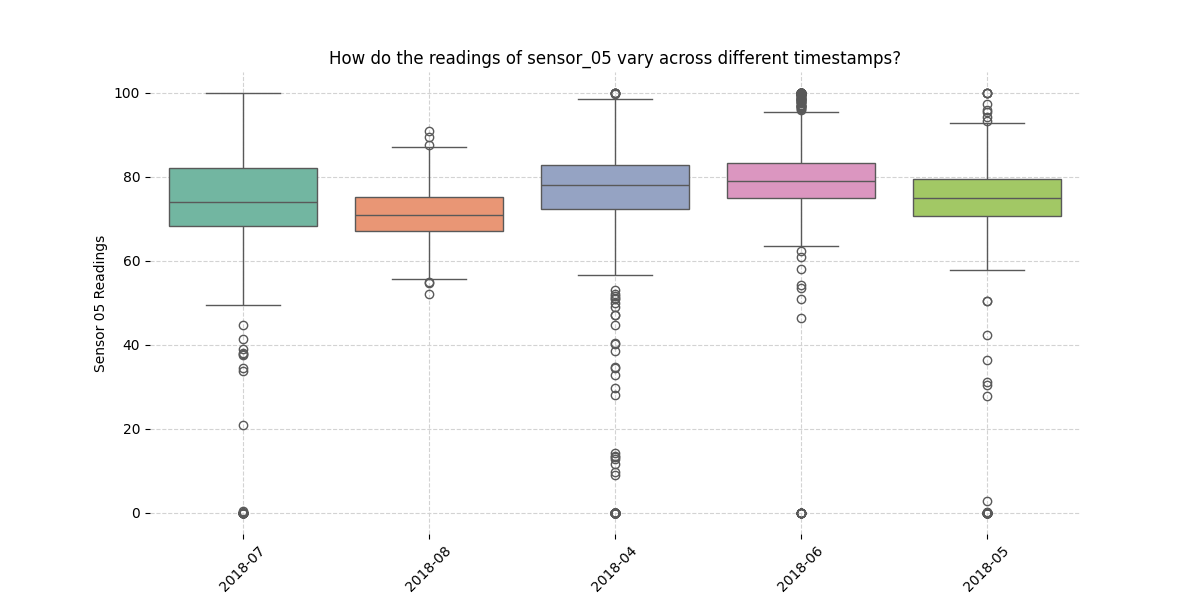

In [49]:
i = 5
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)  
charts[0]

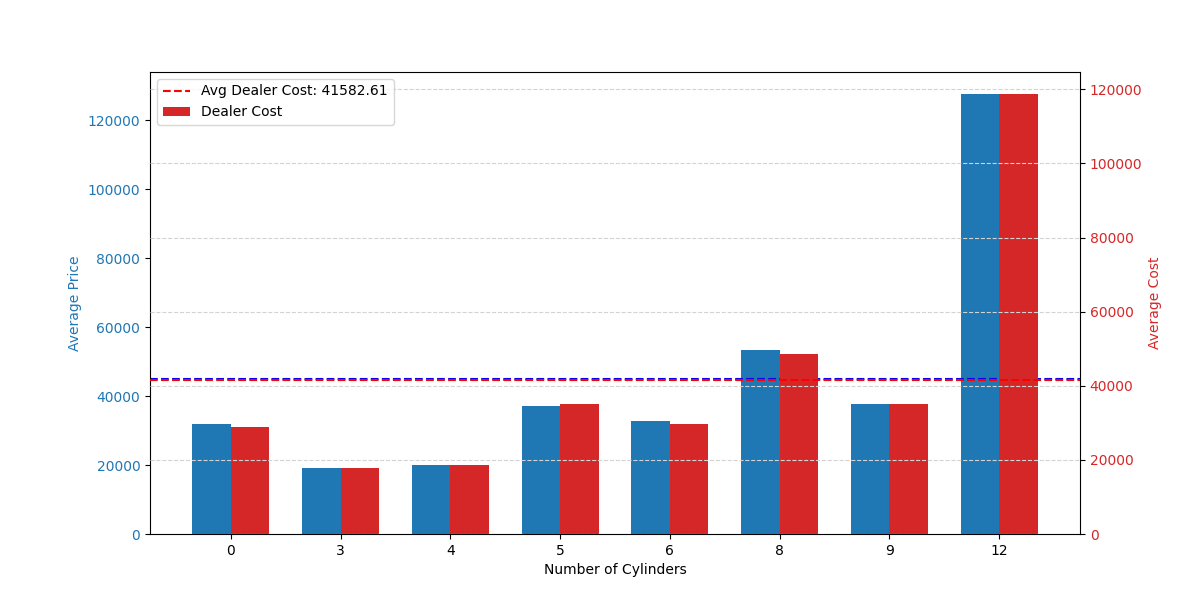

In [31]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["can you separate the bars for average cost and average price and put them side by side instead of stacking them?"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

## Save Code

In [51]:
# SAVE

with open('code-sensor-5-v2-5-6.pkl', 'wb') as f:
    pickle.dump(charts[0], f)

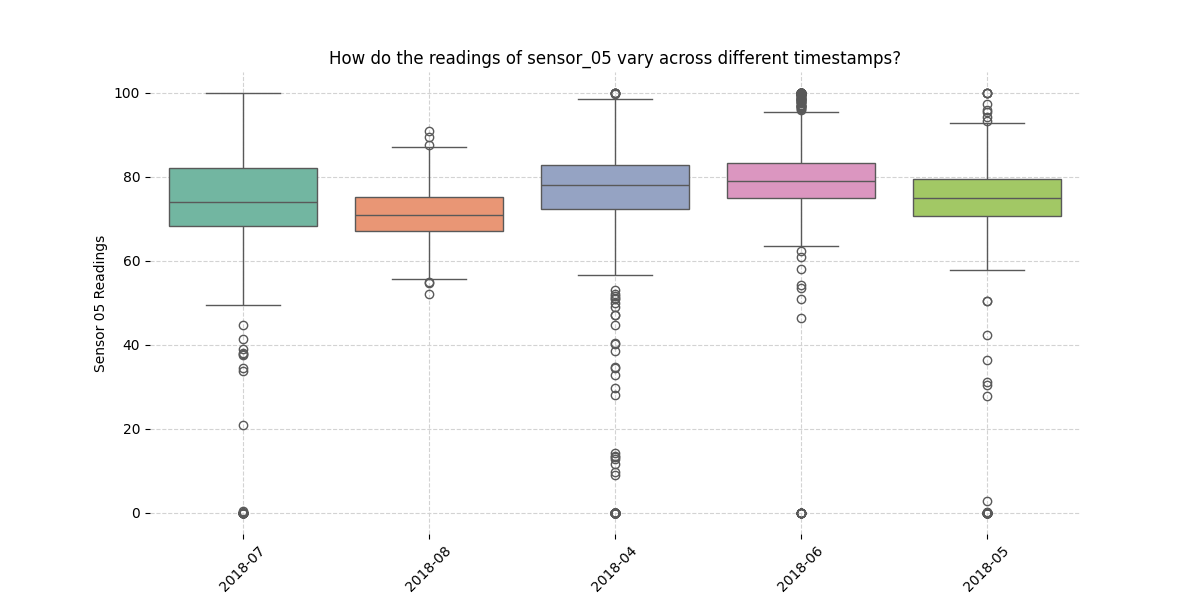

In [52]:
# LOAD

with open('code-sensor-5-v2-5-6.pkl', 'rb') as f:
    code = pickle.load(f)

display(code)

# Prompter (Generating Questions)

In [53]:
questions = lida.prompt(goals[5], textgen_config=textgen_config, n=10)  

In [54]:
print(questions)

[Prompt(question='What are the median readings of sensor_05 for each month?', rationale='This tells us about the central tendency of sensor_05 readings across different months, allowing us to identify which months have higher or lower typical values.', index=0), Prompt(question='Are there any months with significant outliers in sensor_05 readings?', rationale='Identifying outliers can help us understand unusual events or anomalies that may require further investigation.', index=1), Prompt(question='How do the interquartile ranges (IQR) of sensor_05 readings compare across months?', rationale='This will provide insights into the variability of sensor_05 readings, indicating which months have more consistent readings versus those with greater fluctuations.', index=2), Prompt(question='Which month shows the highest maximum reading for sensor_05?', rationale='Understanding the peak values can help identify periods of extreme conditions or events affecting sensor_05.', index=3), Prompt(ques

In [55]:
for prompt in questions:
    display(prompt)


### Prompt 0
---
**Question:** What are the median readings of sensor_05 for each month?

**Rationale:** This tells us about the central tendency of sensor_05 readings across different months, allowing us to identify which months have higher or lower typical values.




### Prompt 1
---
**Question:** Are there any months with significant outliers in sensor_05 readings?

**Rationale:** Identifying outliers can help us understand unusual events or anomalies that may require further investigation.




### Prompt 2
---
**Question:** How do the interquartile ranges (IQR) of sensor_05 readings compare across months?

**Rationale:** This will provide insights into the variability of sensor_05 readings, indicating which months have more consistent readings versus those with greater fluctuations.




### Prompt 3
---
**Question:** Which month shows the highest maximum reading for sensor_05?

**Rationale:** Understanding the peak values can help identify periods of extreme conditions or events affecting sensor_05.




### Prompt 4
---
**Question:** Is there a noticeable trend in the readings of sensor_05 over the months?

**Rationale:** This can reveal seasonal patterns or changes in the environment that may influence sensor_05 readings.




### Prompt 5
---
**Question:** How do the readings of sensor_05 in winter months compare to summer months?

**Rationale:** This comparison can help identify seasonal effects on sensor_05 readings, which may be critical for understanding environmental impacts.




### Prompt 6
---
**Question:** Are there any months where the readings of sensor_05 are consistently below or above a certain threshold?

**Rationale:** Identifying these months can help in assessing compliance with expected operational ranges or safety standards.




### Prompt 7
---
**Question:** What percentage of readings fall within the first and third quartiles for each month?

**Rationale:** This will help us understand the distribution of readings and how concentrated they are around the median.




### Prompt 8
---
**Question:** Do any months exhibit a bimodal distribution in sensor_05 readings?

**Rationale:** This could indicate the presence of two distinct processes or conditions affecting the sensor readings during those months.




### Prompt 9
---
**Question:** How do the readings of sensor_05 correlate with external factors (e.g., temperature, humidity) during each month?

**Rationale:** Understanding these correlations can provide insights into the factors influencing sensor_05 readings and help in predictive modeling.



## Saving prompts

In [56]:
# SAVE

with open('prompt4-s5-v3-6-5.pkl', 'wb') as f:
    pickle.dump(questions, f)

In [57]:
# LOAD

with open('prompt4-s5-v3-6-5.pkl', 'rb') as f:
    prompts = pickle.load(f)

display(prompts)

[Prompt(question='What are the median readings of sensor_05 for each month?', rationale='This tells us about the central tendency of sensor_05 readings across different months, allowing us to identify which months have higher or lower typical values.', index=0),
 Prompt(question='Are there any months with significant outliers in sensor_05 readings?', rationale='Identifying outliers can help us understand unusual events or anomalies that may require further investigation.', index=1),
 Prompt(question='How do the interquartile ranges (IQR) of sensor_05 readings compare across months?', rationale='This will provide insights into the variability of sensor_05 readings, indicating which months have more consistent readings versus those with greater fluctuations.', index=2),
 Prompt(question='Which month shows the highest maximum reading for sensor_05?', rationale='Understanding the peak values can help identify periods of extreme conditions or events affecting sensor_05.', index=3),
 Prompt(

# Generating Insights

In [61]:
answers_p2=[
    "For 0 cylinders, around 35k, 3 and 4 cylinders is 20k, 5 cylinders is almost 40k, 6 cylinders is about 35k, 8 cylinders is around 55k, 9 cylinders is around 40k and 12 cylinders is around 120k.",
    "Well, the ones with lower cylinder counds are generally lower than the one with higher cylinder counts. But this isn't always the case, since 0 cylinders' cost is greater than 3 and 4 cylinders and is around equal with 6 cylinders. Here's the general ranking from most to least cost per number of cylinders: 12, 8, 9, 5, 6, 0, 4, 3.",
    "They're always super close to each other that there's barely any significant difference.",
    "In terms of both dealer cost and retail price, cars with 12 cylinders cost around 3x more than the average of all, which is around 40k.",
    "Can't tell because the visualization doesn't show relationships across time."
]

answers_p3=[
    "Oddly, the average price of cars with 0 cylinders are greater than those with 3 and 4 and is around the same as cars with 6 cylinders. All the other prices fall under or relatively close to 40,000 until the price of cars with 12 cylinders suddenly faces a drastic spike which is around 3x the others.",
    "The dealer costs are almost exactly the same as the average price.",
    "The dealer cost and average price are almost exactly the same.",
    "Yeah, generally. 12 has the highest price and cost, followed by 8, 9, then 5, then 6 and 0, then 4 and 3.",
    "At cylinder count of 12. The price and cost is 3x the average.",
    "The price and the cost are almost exactly the same. For cars with lover cylinder counts, they are below the average of 40,000.",
    "Between 4 and 6, the difference is around 5k. Between 6 and 8, the difference is around 10k.",
    "Cars with 12 cylinders have an extremely high cost and price of 120,000.",
    "I don't know the industry standards.",
    "I do not have information on this."
]

answers_p4 = [
    "The median readings across all months are all close to 80, but below 80. June 2018 had the highest median though that is closest to 80, followed by April 2018, then May 2018, then July 2018 and finally August 2018 has the lowest median of around 70.",
    "All of the months have significant outliers, but in kind of different ways. July has a lot of outliers that only goes below the minimum. April has the most outliers that go below the minimum (maybe around 20?) and one outlier that foes above the maximum, but it's not too far from the maximum. June has a lot of outliers below the minimum too, but one of the outliers is super extreme and is super separated from the rest.  June also has a lot of outliers above the max of 95. May has outliers below the minimum and above but nothing too noteworthy. Finally, August has the least amount of outliers, only 3 above the maximum and 2 below the minimum.",
    "To me, they all look pretty close to each other. The third quartile is all above 80 except in August, where it's around 75. All the first quartile lines are around 75.",
    "I dunno if it's exactly the highest maximum reading since April, June and May have outliers reaching 100, but the max value of July reaches 100.",
    "Well the width of the box from April to June looks pretty similar to me, then it dramatically widens in july but then shrinks and sinks a bit more than usual in August.",
    "The median is generally higher during the summer months than in the winter months.",
    "Across all months, the max and the min are all within the range of 50 - 100.",
    "I can't tell",
    "I can't really tell from a box plot but it doesn't look like there's any?",
    "I dunno, I don't have any other information."
]

insights = lida.insights(goal=goals[5], answers=answers_p4, prompts=prompts)


        Here are the questions and the answers to those questions:
        
            

 Question 1: What are the median readings of sensor_05 for each month?
            
 Answer: The median readings across all months are all close to 80, but below 80. June 2018 had the highest median though that is closest to 80, followed by April 2018, then May 2018, then July 2018 and finally August 2018 has the lowest median of around 70.
            
            

 Question 2: Are there any months with significant outliers in sensor_05 readings?
            
 Answer: All of the months have significant outliers, but in kind of different ways. July has a lot of outliers that only goes below the minimum. April has the most outliers that go below the minimum (maybe around 20?) and one outlier that foes above the maximum, but it's not too far from the maximum. June has a lot of outliers below the minimum too, but one of the outliers is super extreme and is super separated from the rest.  June also 

In [62]:
for insight in insights:
    display(insight)


### Insight 0
---
**Insight:** The consistent median readings of sensor_05 being close to 80 across all months, with a peak in June, could indicate a seasonal effect where environmental factors stabilize readings during late spring, while the drop in August suggests a potential influence of summer heat or humidity.



### Insight 1
---
**Insight:** The significant outliers in July, particularly those below the minimum, may suggest an unusual event or malfunction during that month, which could be linked to external factors such as equipment stress or environmental changes, contrasting with the more balanced outlier distribution in other months.



### Insight 2
---
**Insight:** The interquartile ranges being similar across months, except for August's lower third quartile, may indicate that while the central tendency remains stable, the variability in readings increases in the summer months, potentially due to fluctuating environmental conditions.



### Insight 3
---
**Insight:** The presence of maximum readings reaching 100 in multiple months, particularly in April and June, suggests that sensor_05 may be capturing peak conditions that are not sustainable, hinting at possible calibration issues or extreme environmental events.



### Insight 4
---
**Insight:** The higher median readings during summer months compared to winter months, alongside the widening box in July, could imply that sensor_05 is more sensitive to temperature variations, which may affect its readings, leading to a need for seasonal calibration.


In [63]:
#SAVE

with open('insight-p4-v3-6-5.pkl', 'wb') as f:
    pickle.dump(insights, f)

### Generate visualization via a "user query"   

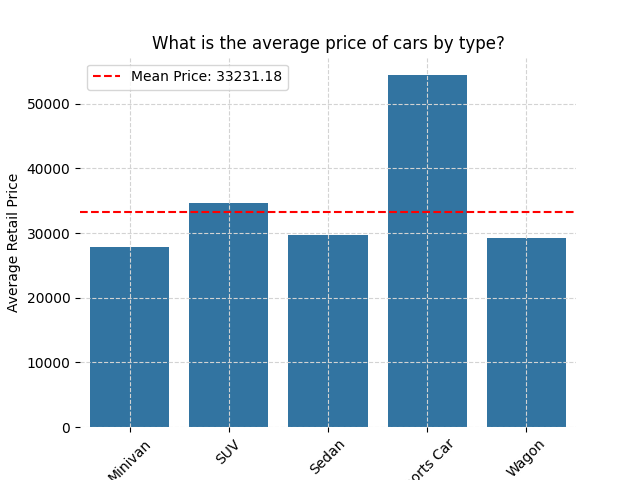

In [7]:
user_query = "What is the average price of cars by type?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)  
charts[0]

# VizOps

Given that LIDA represents visualizations as code,
the VISGENERATOR also implements submodules
to perform operations on this representation. 

This includes 
- **Natural language based visualization refinement**: Provides a conversational api to iteratively
4Execution in a sandbox environment is recommended.
refine generated code (e.g., translate chart t hindi
. . . zoom in by 50% etc) which can then be executed to generate new visualizations.
- **Visualization explanations and accessibility**:
Generates natural language explanations (valuable
for debugging and sensemaking) as well as accessibility descriptions (valuable for supporting users
with visual impairments).

- **Visualization code self-evaluation and repair**:
Applies an LLM to self-evaluate generated code on
multiple dimensions (see section 4.1.2).

- **Visualization recommendation**: Given some context (goals, or an existing visualization), recommend additional visualizations to the user (e.g., for
comparison, or to provide additional perspectives).



## Natural language based visualization refinement 

Given some code, modify it based on natural language instructions. This yields a new code snippet that can be executed to generate a new visualization.

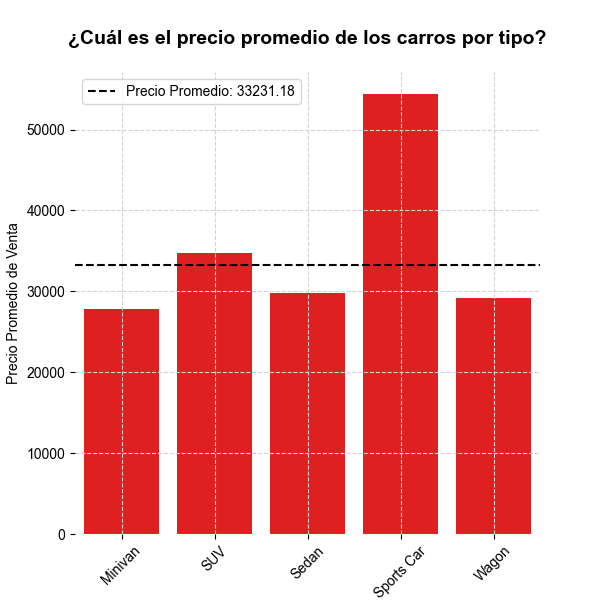

In [8]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["make the chart height and width equal", "change the color of the chart to red", "translate the chart to spanish"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

## Visualization explanations and accessibility

In [9]:
explanations = lida.explain(code=code, library=library, textgen_config=textgen_config) 
for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

accessibility  **  The chart is a bar plot created using the seaborn library. The goal of the chart is to show the average retail price of cars by type. The x-axis represents the different types of cars, while the y-axis represents the average retail price. The chart uses a blue color scheme for the bars and a red dashed line to represent the mean retail price. The chart is easy to read and understand, with clear labels and a title that summarizes the main insight.
transformation  **  This section of the code groups the data by car type and calculates the mean retail price for each group. The resulting data is stored in a new dataframe called grouped_data. The groupby() method is used to group the data by the 'Type' column, and the mean() method is used to calculate the average retail price for each group. The reset_index() method is used to reset the index of the resulting dataframe.
visualization  **  This section of the code creates the visualization of the data. The seaborn barplot

## Visualization code self-evaluation and repair

In [10]:
evaluations = lida.evaluate(code=code,  goal=goals[i], textgen_config=textgen_config, library=library)[0] 
for eval in evaluations:
    print(eval["dimension"], "Score" ,eval["score"], "/ 10")
    print("\t", eval["rationale"][:200])
    print("\t**********************************")

bugs Score 10 / 10
	 The code is free of bugs, syntax errors, and typos. It should compile without issues.
	**********************************
transformation Score 8 / 10
	 The data is grouped by Type and the mean of Retail_Price is calculated. However, this transformation is not appropriate for the specified goal of exploring the relationship between engine size and hor
	**********************************
compliance Score 6 / 10
	 The code does not fully meet the specified goal of exploring the relationship between engine size and horsepower. The plot shows the average retail price of cars by type instead.
	**********************************
type Score 3 / 10
	 The barplot is not an appropriate visualization type for exploring the relationship between engine size and horsepower. A scatterplot or line plot would be more appropriate.
	**********************************
encoding Score 8 / 10
	 The data is encoded appropriately with Type on the x-axis and Retail_Price on the y-axis. Howev

## Visualization Recommendation

In [11]:
textgen_config = TextGenerationConfig(n=2, temperature=0.2, use_cache=True)
recommended_charts =  lida.recommend(code=code, summary=summary, n=2,  textgen_config=textgen_config)

Recommended 1 charts


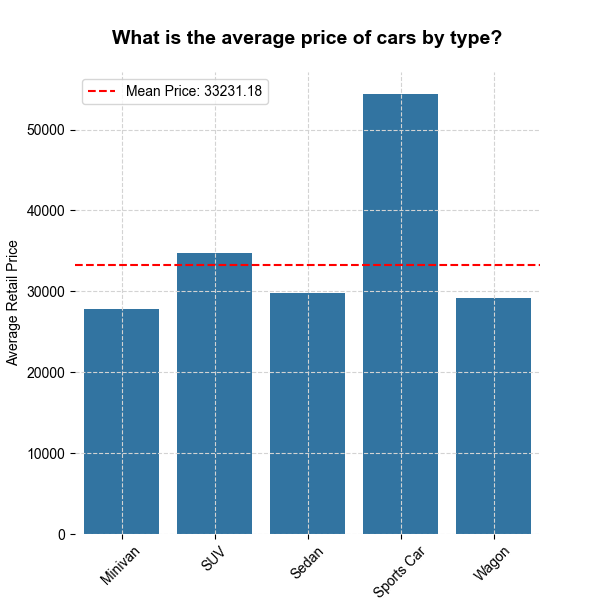

In [12]:
print(f"Recommended {len(recommended_charts)} charts")
for chart in recommended_charts:
    display(chart) 

## Infographics (Beta)

- Explores using LIDA to generate infographics from an existing visualization 
- Uses the `peacasso` package, and loads open source stable diffusion models 
- You will need to run `pip install lida[infographics]` to install the required dependencies.
- Currently work in progress (work being done to post process infographics with chart axis and title overlays from the original visualization, add presets for different infographic styles, and add more stable diffusion models)


In [13]:
# !pip install lida[infographics] 
# ensure you have a GPU runtime

In [ ]:
infographics = lida.infographics(visualization = edited_charts[0].raster, n=1, style_prompt="pastel art, green pearly rain drops, highly detailed, no blur, white background")

In [ ]:
from lida.utils import plot_raster
plot_raster([edited_charts[0].raster, infographics["images"][0]]) 